   customer_id  transaction_amount transaction_type     transaction_time  \
0         1102          929.298826           credit  2024-01-01 00:00:00   
1         1435          405.697592           credit  2024-01-01 00:01:00   
2         1860          906.204891         transfer  2024-01-01 00:02:00   
3         1270          322.174206           credit  2024-01-01 00:03:00   
4         1106          476.960549            debit  2024-01-01 00:04:00   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   int64  
 1   transaction_amount  5000 non-null   float64
 2   transaction_type    5000 non-null   object 
 3   transaction_time    5000 non-null   object 
 4   is_fraud            5000 non-null   int64  
dtypes: fl

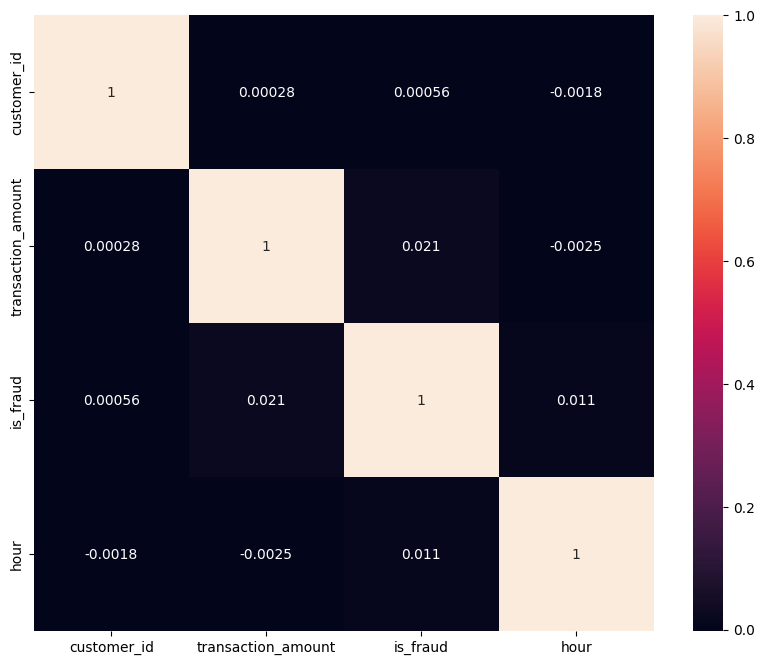

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       500
           1       1.00      1.00      1.00      4500

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [19]:
!pip install pandas seaborn matplotlib
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report


df = pd.read_csv('synthetic_fraud_data_5000.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())

df.fillna(df.select_dtypes(include='number').median(), inplace=True)
print(df.columns)

print(df['transaction_amount'])

le = LabelEncoder()
df['transaction_amount'] = le.fit_transform(df['transaction_amount'])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['transaction_amount', 'transaction_amount']])

df['hour'] = pd.to_datetime(df['transaction_time']).dt.hour

df['amount_range'] = pd.cut(df['transaction_amount'], bins=[0, 50, 100, 500, 1000], labels=['small', 'medium', 'large', 'very_large'])

df['transaction_amount'] = pd.to_numeric(df['transaction_amount'])

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

if_model = IsolationForest(contamination=0.1)
if_model.fit(numeric_df)
anomaly_scores = if_model.decision_function(numeric_df)
anomaly_labels = if_model.predict(numeric_df)

print("Accuracy:", accuracy_score(anomaly_labels, anomaly_labels))
print("Classification Report:")
print(classification_report(anomaly_labels, anomaly_labels))